In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [23]:
sales_df = pd.read_excel("./datasets/2015Sales.xlsx")
salesdm_df = pd.read_excel("./datasets/SalesDimensions.xlsx")
calendar_df = pd.read_excel("./datasets/CalendarAndRevisedMonthlyBudget.xlsx")

In [14]:
print("Sales Dataset:", sales_df.shape)
print("Sales Dimensions Dateset:", salesdm_df.shape)
print("Monthly Revenue Dataset:", calendar_df.shape)

Sales Dataset: (46291, 13)
Sales Dimensions Dateset: (2517, 9)
Monthly Revenue Dataset: (3288, 8)


In [15]:
sales_df.head()

,YearMonth,YearNbr,MonthNbr,LocationId,ProductId,IsSoldInPromo,CustomerId,SalesQuantity,SalesAmount,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount
0,20151,2015,1,307,1682,1,1005.0,1,7.6415,0,0.0,1,1.3485
1,20151,2015,1,307,1700,1,113.0,1,7.5480,0,0.0,1,1.3320
2,20151,2015,1,307,1296,1,19112.0,13,276.2500,0,0.0,13,48.7500
3,20151,2015,1,199,216,1,14205.0,1,521.5500,0,0.0,1,27.4500
4,20151,2015,1,307,1706,1,766.0,1,7.5480,0,0.0,1,1.3320


In [24]:
sales_df["YearMonth"] = sales_df["YearMonth"].astype(str)

sales_df["YearMonth"] = sales_df["YearMonth"].apply(lambda x: x[:4] + '-'+'0'+x[4:] + '-01' if len(x) <= 5 else  x[:4] + '-' +x[4:] + '-01')

sales_df["YearMonth"] = pd.to_datetime(sales_df["YearMonth"])

In [26]:
sales_df.head()

,YearMonth,YearNbr,MonthNbr,LocationId,ProductId,IsSoldInPromo,CustomerId,SalesQuantity,SalesAmount,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount
0,2015-01-01,2015,1,307,1682,1,1005.0,1,7.6415,0,0.0,1,1.3485
1,2015-01-01,2015,1,307,1700,1,113.0,1,7.5480,0,0.0,1,1.3320
2,2015-01-01,2015,1,307,1296,1,19112.0,13,276.2500,0,0.0,13,48.7500
3,2015-01-01,2015,1,199,216,1,14205.0,1,521.5500,0,0.0,1,27.4500
4,2015-01-01,2015,1,307,1706,1,766.0,1,7.5480,0,0.0,1,1.3320


In [69]:
def plot_bar(df:pd.DataFrame, x_col, y_col,hue_col, palette='plasma'):

    plt.figure(figsize=(15, 10))
    sns.barplot(
    data=df, x=x_col, y=y_col,
    palette=palette, hue=hue_col, dodge=False)
    plt.show()

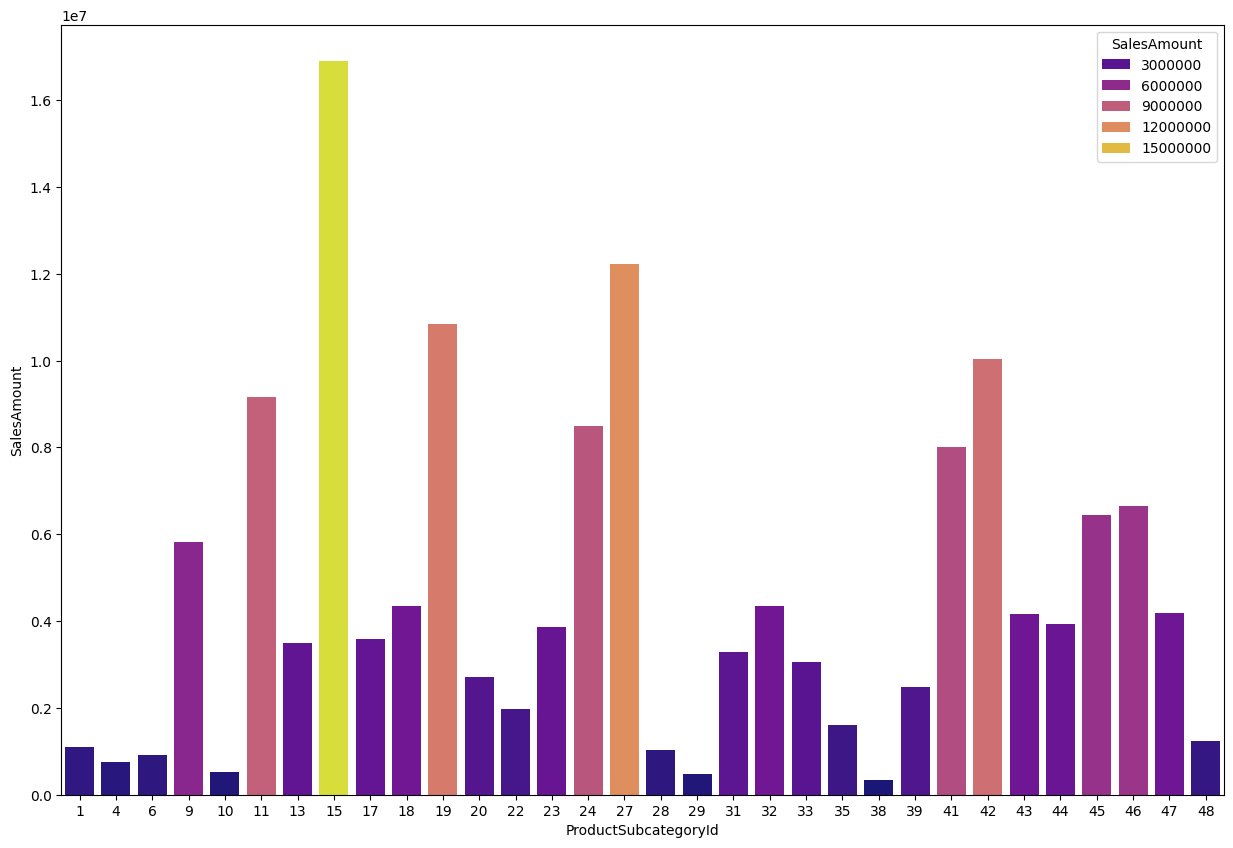

In [70]:
df = pd.merge(sales_df, salesdm_df, on="ProductId", how="inner")

sales_analysis = df.groupby('ProductSubcategoryId')["SalesAmount"].sum().reset_index()

plot_bar(df=sales_analysis, x_col='ProductSubcategoryId',y_col='SalesAmount',hue_col='SalesAmount')

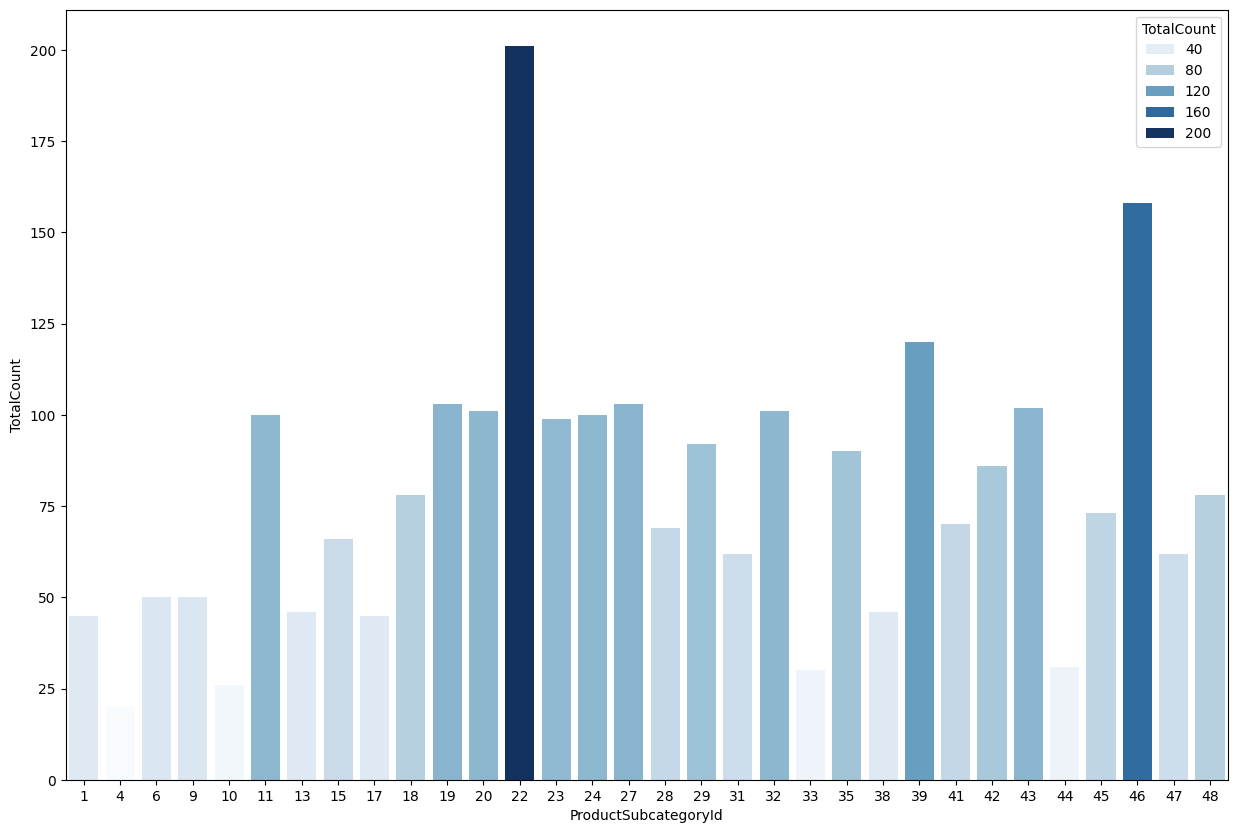

In [71]:
sales_count = df.groupby('ProductSubcategoryId')["ProductId"].nunique().reset_index(name="TotalCount")

plot_bar(sales_count,'ProductSubcategoryId', 'TotalCount', 'TotalCount','Blues')

In [78]:
calendar_df["YearMonth"] = calendar_df["YearMonth"].astype(str)
calendar_df["Month"] = calendar_df["YearMonth"].str[4:].astype(int)


In [103]:
monthly_sales = df.groupby("MonthNbr")["SalesAmount"].sum().reset_index(name="TotalAmount")

In [108]:
month_nums = monthly_sales["MonthNbr"].tolist()
months_str = calendar_df["MonthAbbr"].unique().tolist()

months = {num:month for num, month in zip(month_nums, months_str)}

monthly_sales["MonthNbr"] = monthly_sales["MonthNbr"].apply(lambda x: months[x])

monthly_sales = monthly_sales.rename(columns={"MonthNbr":"Month"})

monthly_sales

,Month,TotalAmount
0,Jan,1.007993e+07
1,Feb,1.061046e+07
2,Mar,1.028037e+07
3,Apr,1.278380e+07
4,May,1.329182e+07
5,Jun,1.322994e+07
6,Jul,1.292392e+07
7,Aug,1.326346e+07
8,Sep,1.238539e+07
9,Oct,1.338174e+07


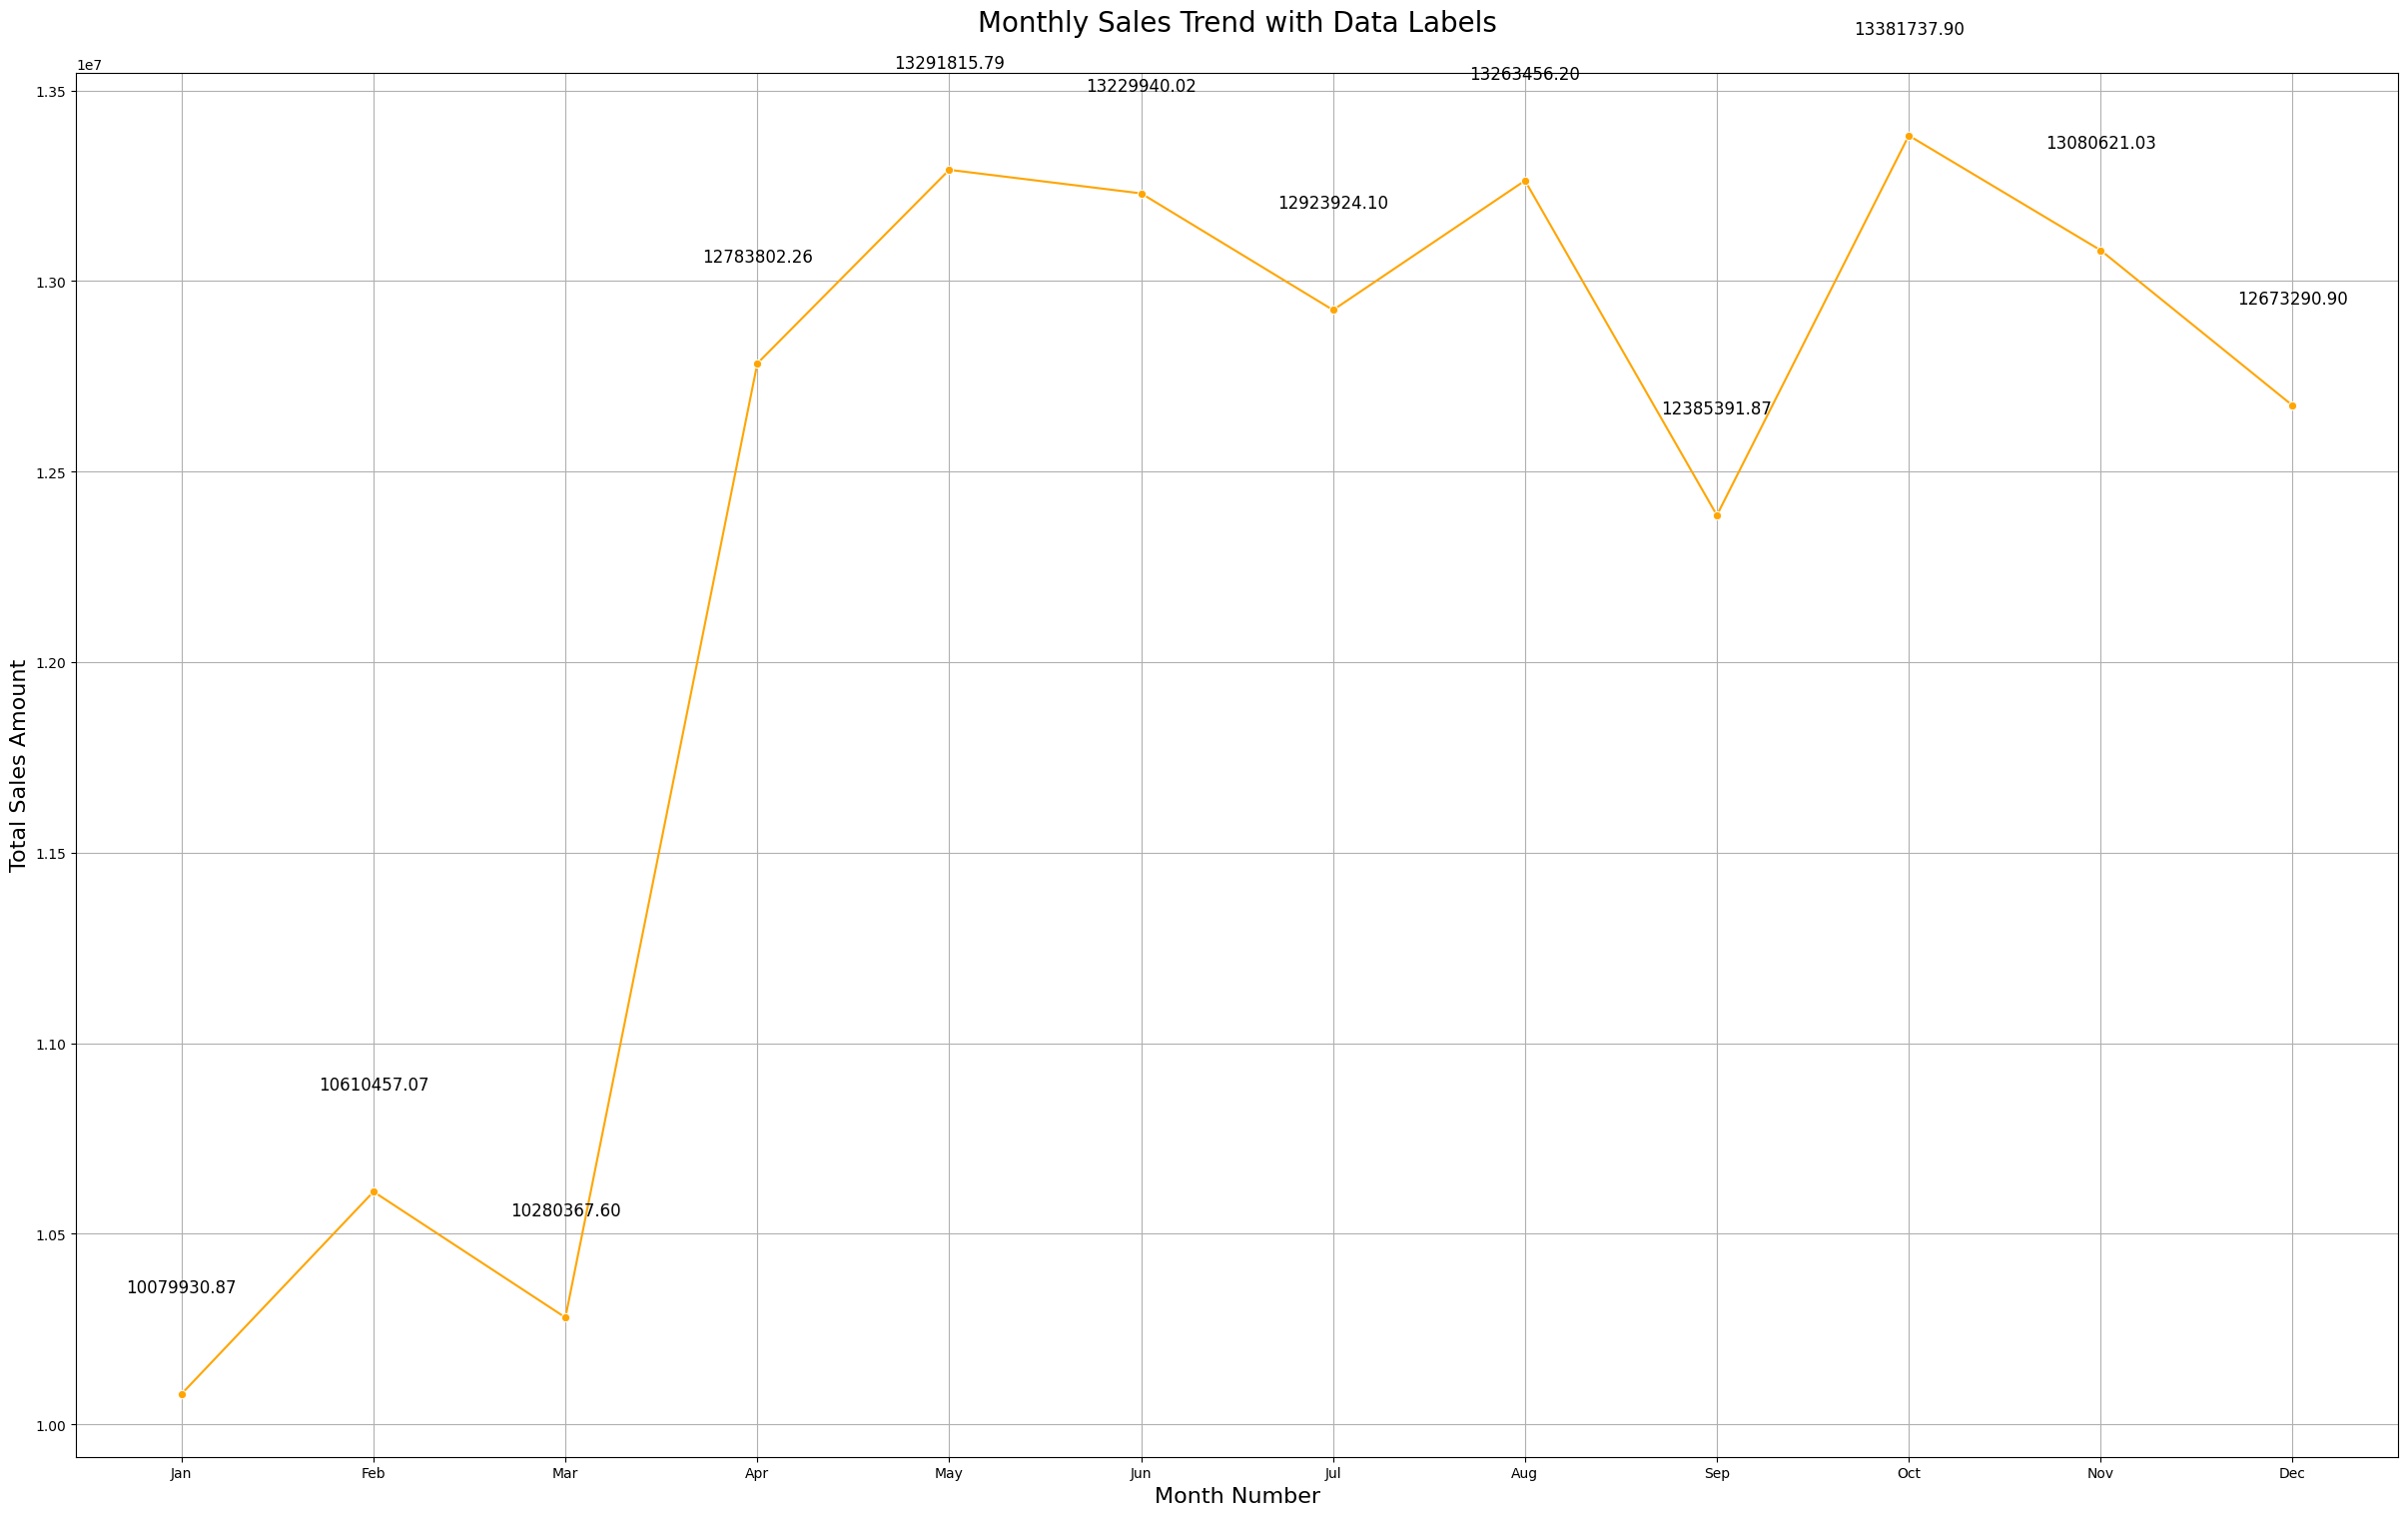

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 18))
sns.lineplot(data=monthly_sales, x='Month', y='TotalAmount', marker='o', color='orange')

for i, txt in enumerate(monthly_sales['TotalAmount']):
    plt.text(monthly_sales['Month'][i], txt + 0.02 * max(monthly_sales['TotalAmount']), 
             f'{txt:.2f}', ha='center', fontsize=12, color='black')

plt.title("Monthly Sales Trend with Data Labels", fontsize=20, pad=30) 
plt.xlabel("Month Number", fontsize=16)
plt.ylabel("Total Sales Amount", fontsize=16)
plt.grid(True)
plt.show()



In [121]:
df["GrossProfit"] = df["SalesAmount"] - (df["SalesQuantity"] * df["Cost"])
df = df.drop(["Profit"], axis=1)

df.head()

,YearMonth,YearNbr,MonthNbr,LocationId,ProductId,IsSoldInPromo,CustomerId,SalesQuantity,SalesAmount,ReturnQuantity,...,DiscountAmount,ProductName,ProductDescription,ProductSubcategoryId,Manufacturer,BrandName,Colour,Cost,RetailPrice,GrossProfit
0,2015-01-01,2015,1,307,1682,1,1005.0,1,7.6415,0,...,1.3485,FTS Hand Games women M400 Silver,"Hand Games women, make you happy",38,Fun Toys,Fun Toys,Silver,4.13,8.99,3.5115
1,2015-01-01,2015,1,307,1700,1,113.0,1,7.5480,0,...,1.3320,Southern V Hand Games women M40 Red,"Hand Games women, make you happy",38,Southern Video,Southern Video,Red,4.08,8.88,3.4680
2,2015-01-01,2015,1,307,1296,1,19112.0,13,276.2500,0,...,48.7500,awari USB Cable M250 Black,Cable for transferring still images from the c...,28,awari,awari,Black,11.50,25.00,126.7500
3,2015-01-01,2015,1,199,216,1,14205.0,1,521.5500,0,...,27.4500,FliWire Home Theater System 4.1 Channel M413 ...,Design produces big and detailed home theater ...,11,"FliWire, Inc",FliWire,Silver,252.47,549.00,269.0800
4,2015-01-01,2015,1,307,1706,1,766.0,1,7.5480,0,...,1.3320,Southern V Hand Games women M40 Silver,"Hand Games women, make you happy",38,Southern Video,Southern Video,Silver,4.08,8.88,3.4680


In [123]:
df["GrossProfitPer"] = df["GrossProfit"] / df["SalesAmount"]

df.head()

,YearMonth,YearNbr,MonthNbr,LocationId,ProductId,IsSoldInPromo,CustomerId,SalesQuantity,SalesAmount,ReturnQuantity,...,ProductName,ProductDescription,ProductSubcategoryId,Manufacturer,BrandName,Colour,Cost,RetailPrice,GrossProfit,GrossProfitPer
0,2015-01-01,2015,1,307,1682,1,1005.0,1,7.6415,0,...,FTS Hand Games women M400 Silver,"Hand Games women, make you happy",38,Fun Toys,Fun Toys,Silver,4.13,8.99,3.5115,0.459530
1,2015-01-01,2015,1,307,1700,1,113.0,1,7.5480,0,...,Southern V Hand Games women M40 Red,"Hand Games women, make you happy",38,Southern Video,Southern Video,Red,4.08,8.88,3.4680,0.459459
2,2015-01-01,2015,1,307,1296,1,19112.0,13,276.2500,0,...,awari USB Cable M250 Black,Cable for transferring still images from the c...,28,awari,awari,Black,11.50,25.00,126.7500,0.458824
3,2015-01-01,2015,1,199,216,1,14205.0,1,521.5500,0,...,FliWire Home Theater System 4.1 Channel M413 ...,Design produces big and detailed home theater ...,11,"FliWire, Inc",FliWire,Silver,252.47,549.00,269.0800,0.515924
4,2015-01-01,2015,1,307,1706,1,766.0,1,7.5480,0,...,Southern V Hand Games women M40 Silver,"Hand Games women, make you happy",38,Southern Video,Southern Video,Silver,4.08,8.88,3.4680,0.459459


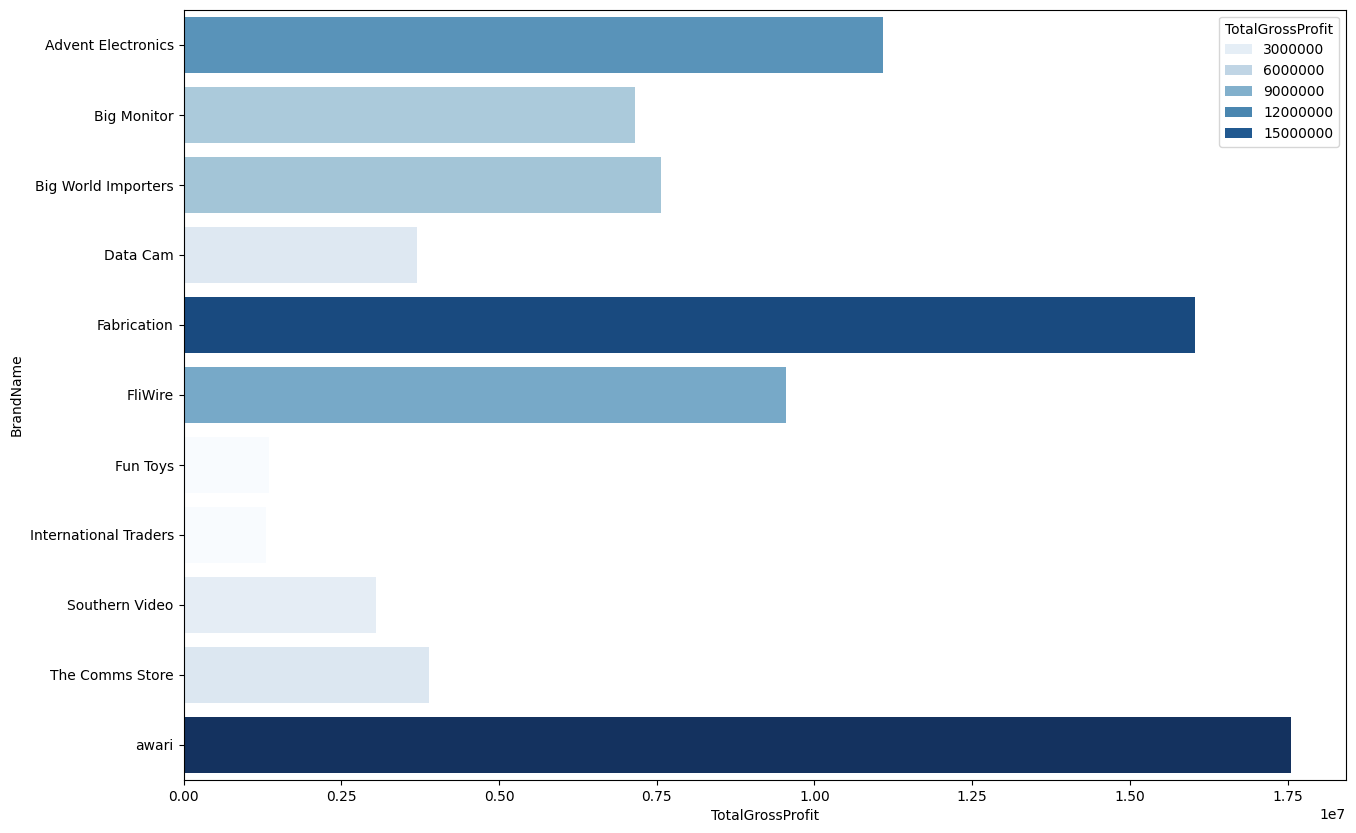

In [132]:
profit_analysis = df.groupby("BrandName").agg({"GrossProfit":"sum", "GrossProfitPer":"sum"}).reset_index()

profit_analysis = profit_analysis.rename(columns={"GrossProfit":"TotalGrossProfit", "GrossProfitPer":"Percentage"})

plot_bar(profit_analysis, "TotalGrossProfit","BrandName", hue_col="TotalGrossProfit", palette="Blues")

In [139]:
total_amount = df["SalesAmount"].sum()
gross_profit = (df["SalesAmount"] - (df["Cost"]*df["SalesQuantity"])).sum()
gross_profit_percentage = round((df["SalesAmount"] - (df["Cost"]*df["SalesQuantity"])).sum() / df["SalesAmount"].sum() *100, 2)

pd.DataFrame({
    "Total Sales":[total_amount],
    "Gross Profit": [gross_profit],
    "Gross Profit %": [gross_profit_percentage]
})

,Total Sales,Gross Profit,Gross Profit %
0,1.479847e+08,8.224771e+07,55.58


In [142]:
monthly_profit = df.groupby("MonthNbr")["GrossProfit"].sum().reset_index()

month_nums = monthly_profit["MonthNbr"].tolist()
months_str = calendar_df["MonthAbbr"].unique().tolist()

months = {num:month for num, month in zip(month_nums, months_str)}

monthly_profit["MonthNbr"] = monthly_profit["MonthNbr"].apply(lambda x: months[x])

monthly_profit = monthly_profit.rename(columns={"MonthNbr":"Month"})

monthly_profit

,Month,GrossProfit
0,Jan,5.496416e+06
1,Feb,5.810445e+06
2,Mar,5.702728e+06
3,Apr,7.210187e+06
4,May,7.576669e+06
5,Jun,7.517771e+06
6,Jul,7.194109e+06
7,Aug,7.398914e+06
8,Sep,6.881833e+06
9,Oct,7.692372e+06


In [155]:
monthly_sales

,Month,TotalAmount
0,Jan,1.007993e+07
1,Feb,1.061046e+07
2,Mar,1.028037e+07
3,Apr,1.278380e+07
4,May,1.329182e+07
5,Jun,1.322994e+07
6,Jul,1.292392e+07
7,Aug,1.326346e+07
8,Sep,1.238539e+07
9,Oct,1.338174e+07


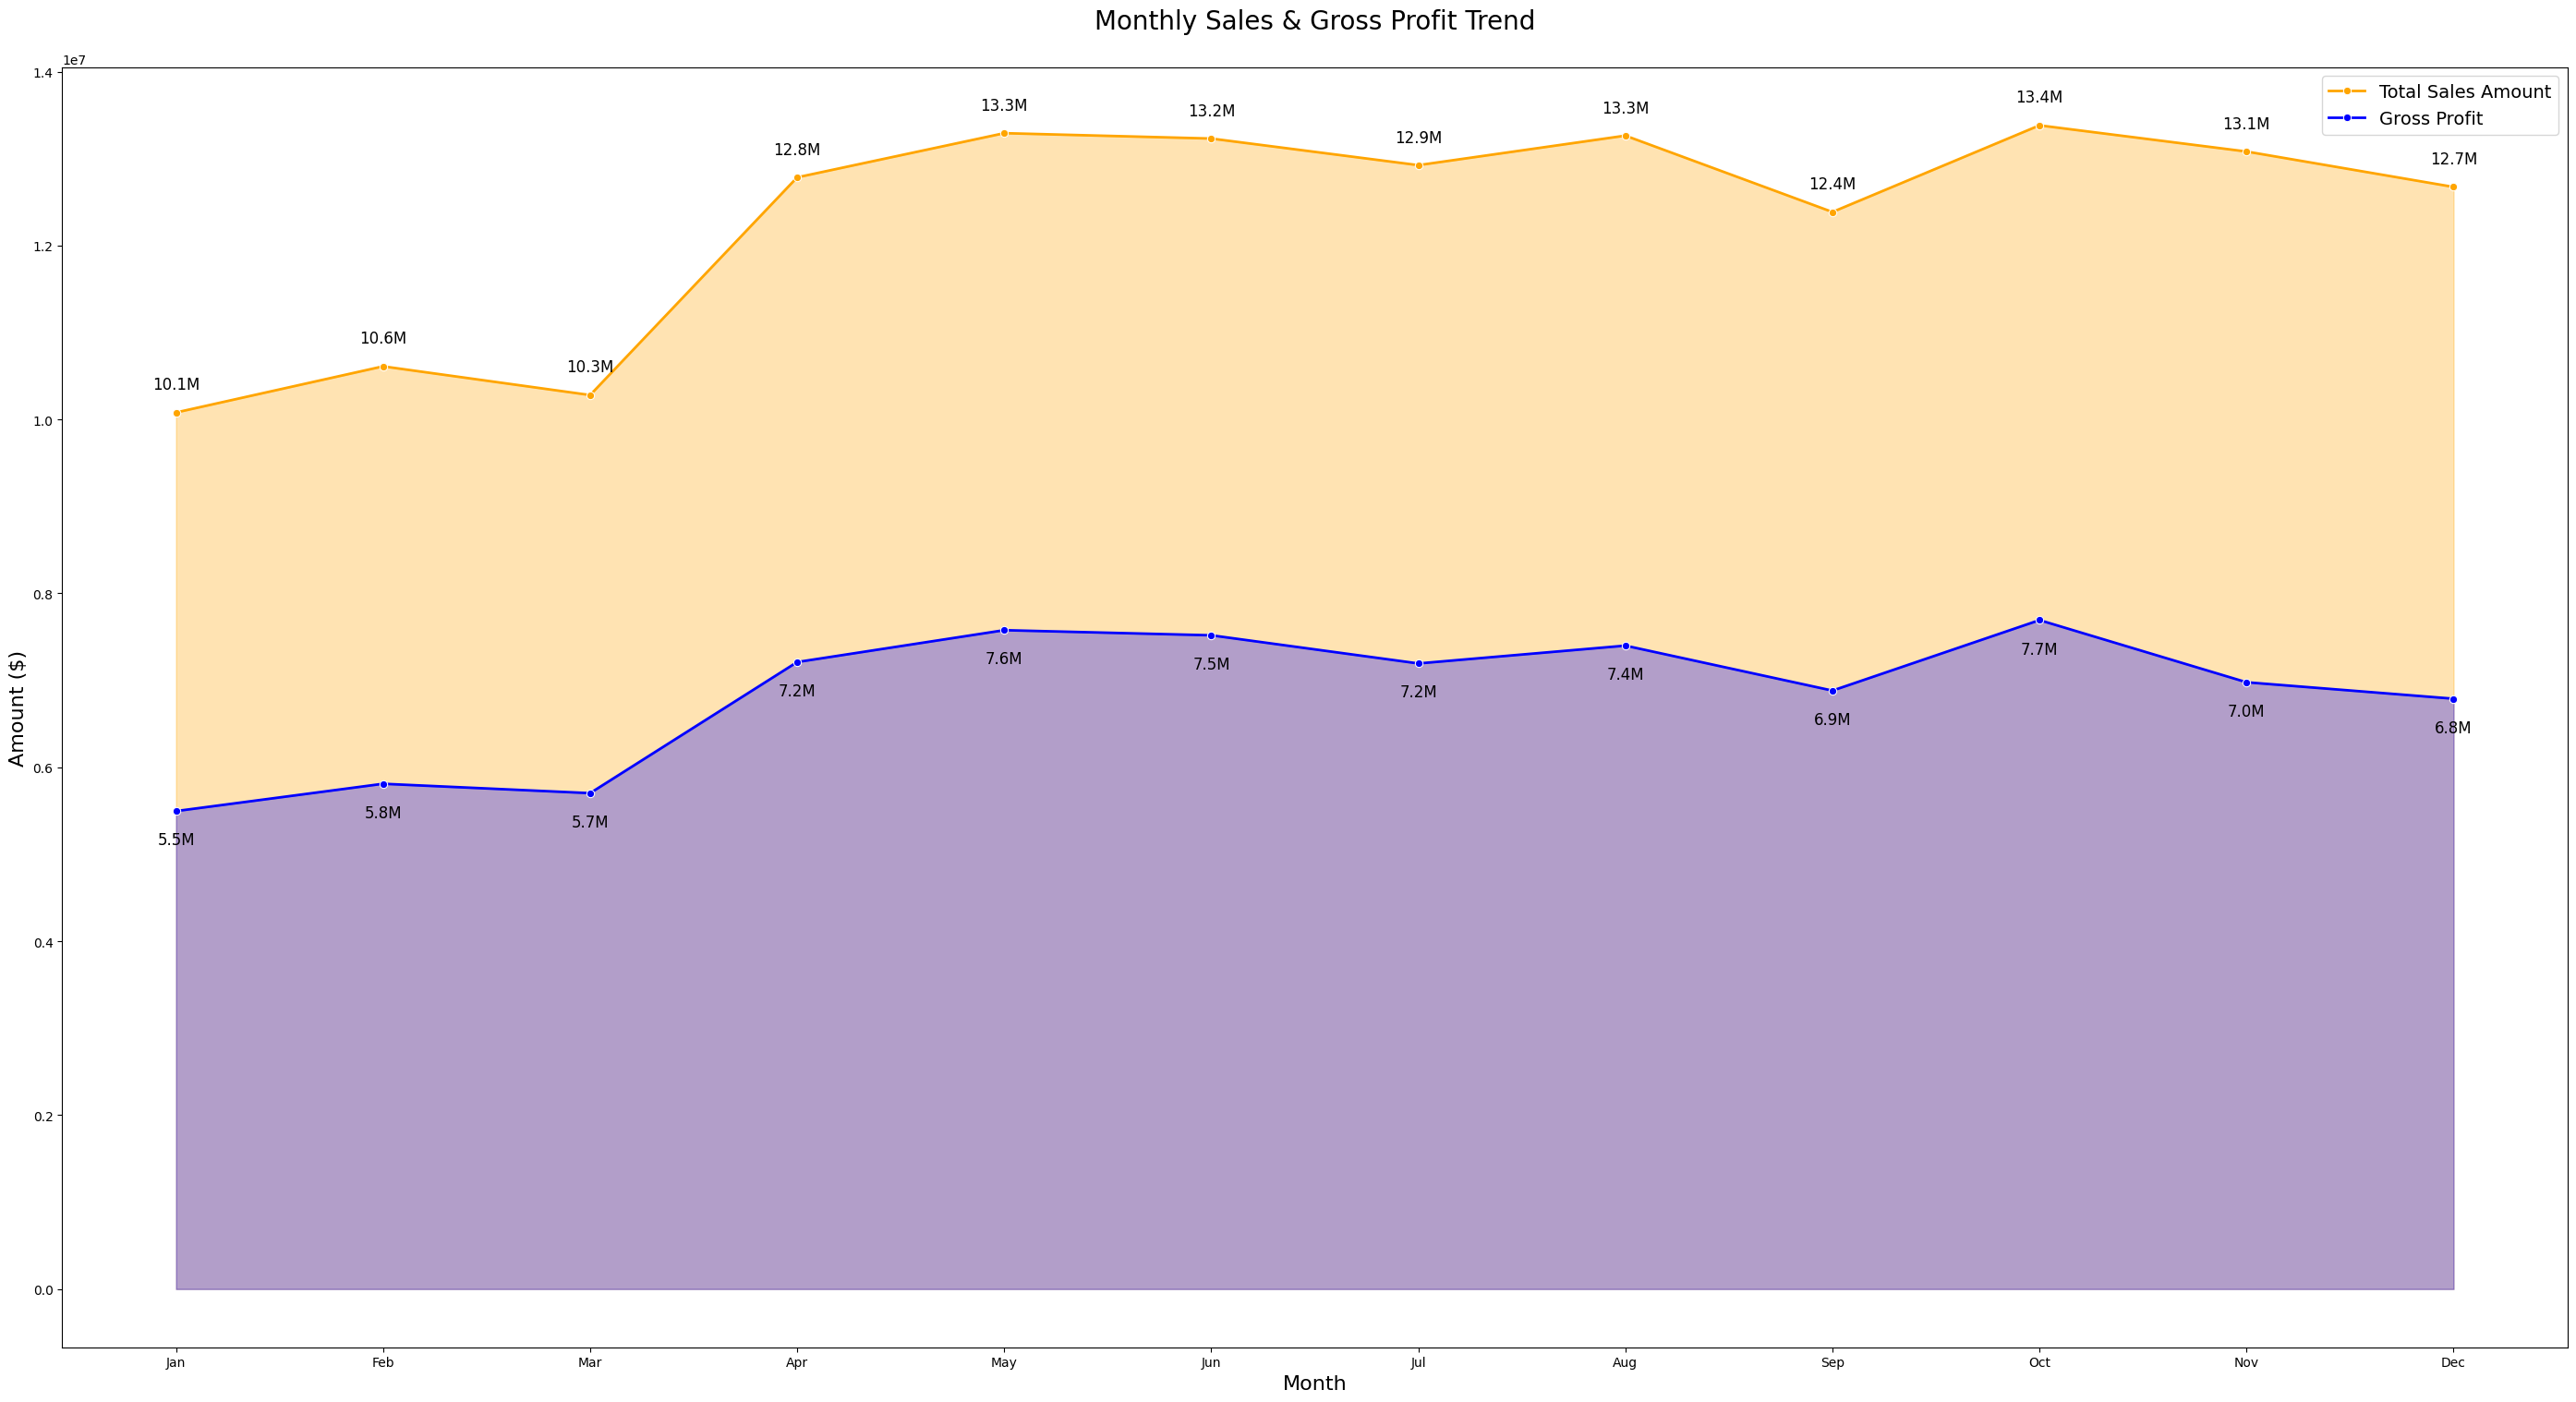

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(35, 18))

sns.lineplot(data=monthly_sales, x="Month", y="TotalAmount", marker='o', color='orange', label="Total Sales Amount", linewidth=2)
sns.lineplot(data=monthly_profit, x="Month", y="GrossProfit", marker='o', color='blue', label="Gross Profit", linewidth=2)

plt.fill_between(monthly_sales["Month"], monthly_sales["TotalAmount"], color='orange', alpha=0.3)
plt.fill_between(monthly_profit["Month"], monthly_profit["GrossProfit"], color='blue', alpha=0.3)

for i, txt in enumerate(monthly_sales["TotalAmount"]):
    plt.text(monthly_sales["Month"].iloc[i], txt + 0.02 * max(monthly_sales["TotalAmount"]), f'{txt/1e6:.1f}M', ha='center', fontsize=12)

for i, txt in enumerate(monthly_profit["GrossProfit"]):
    plt.text(monthly_profit["Month"].iloc[i], txt - 0.05 * max(monthly_profit["GrossProfit"]), f'{txt/1e6:.1f}M', ha='center', fontsize=12)

plt.xlabel("Month", fontsize=16)
plt.ylabel("Amount ($)", fontsize=16)
plt.title("Monthly Sales & Gross Profit Trend", fontsize=20, pad=30)
plt.legend(fontsize=14)
plt.grid(False)

plt.show()

